# Winter in Toronto Profile

## Need to Prioritize:
- Privacy (time based), blinds are closed from Mon-Fri from 9am-5pm ✅

## Meaningfull Data: 
- Higher light levels during sunrise to sunset, according to the month ✅
- When blinds are opened, temperature increases by 1 if light level is > 600 ✅
- When blinds are closed, temperature decrease by 0.5 if light level is < 600 ✅
- Blinds are typically used from 6am to 10pm ✅

## TimeandDate.com Reference
- https://www.timeanddate.com/sun/canada/toronto?month=12&year=2021
- https://www.timeanddate.com/weather/canada/toronto/historic?month=12&year=2021

## December 2022:

In [124]:
import pandas as pd
import random
from datetime import datetime

#dictionary
data = {"Light":[],"Temp":[]}
Timedata = {"RTC":[]}

#Days in a month
for day in range(1,31):

    #maximum of 10 blind operations in a day
    samples = random.randint(0,10) 
    
    for x in range(samples):
        #select time range that people would generally use blinds
        #ex: 6am to 10pm
        time_hour = random.randrange(6,23) 
        #values 0 to 50, 10 steps a time
        time_min = random.randrange(0,60,10)
        
        #convert the date times so they can be sorted 
        #account for single hours, add an extra 0 infront
        if time_hour < 10:
            Time00 = "0" + str(time_hour)  
        else:
            Time00 = time_hour

        if day < 10:
            dayDate = "0" + str(day)
        else: 
            dayDate = str(day)

        time = dayDate + "/12/2022 " + str(Time00) + ":" + str(time_min) + ":00"
        
        dateOBJ = datetime.strptime(time, "%d/%m/%Y %H:%M:%S")

        #append the real time clock
        Timedata["RTC"].append(dateOBJ)
        
Timedata_df = pd.DataFrame(Timedata)

#sort the date times
filtered_Timedata = Timedata_df.sort_values('RTC')

#create hour column
filtered_Timedata['hour'] = filtered_Timedata['RTC'].dt.hour

#convert RTC into weekdays
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 

filtered_Timedata['WeekDay'] = filtered_Timedata['RTC'].dt.dayofweek.map(dw_mapping)

#convert RTC into numeric weekdays
filtered_Timedata['Day'] = filtered_Timedata['RTC'].dt.dayofweek

filtered_Timedata.reset_index(drop=True, inplace=True)

#Profile prioritization, Privacy (time based), blinds not used Mon-Fri from 9am-5pm 
#filtered_Timedata.drop(filtered_Timedata[(filtered_Timedata['Day'] <= 4) & (filtered_Timedata['hour'] >= 9) & (filtered_Timedata['hour'] < 17)].index, inplace=True)

filtered_Timedata.reset_index(drop=True, inplace=True)

#drop duplicate date times
filtered_Timedata = filtered_Timedata.drop_duplicates(subset=['RTC'])

#alternate the state variable accordingly
#0 is rolled down, 1 is rolled up
state = 1
state_array = []

for x in range(len(filtered_Timedata.index)): 
    
    if state == 1:
        state_array.append(state)
        state = 0
    else:
        state_array.append(state)
        state = 1
        
filtered_Timedata.insert(3, "Event", state_array)

#display(filtered_Timedata)

state = 1
for day in range(1,31):
    
    for x in range(samples):
        
        time_hour = filtered_Timedata.iloc[x]['hour']

        #7am to 5 pm sunrise/sunset in the month of December
        #higher light levels during sunrise etc
        if (time_hour > 7 and time_hour < 17): 
            light = random.randint(500,650)
        else: 
            light = random.randint(470,500)

        #add the randomly selected times
        data["Light"].append(light)
        
        #Indoor temperatures are affected whether blinds are opened/closed 
        temp = round(random.uniform(20,24),1)
        
        if state == 0:
            state = 1
            if light < 600:
                temp = temp - 0.5
        elif state == 1:
            state = 0
            if light > 600:
                temp = temp + 1
            
        data["Temp"].append(temp)
        
#convert to pandas dataframe
df = pd.DataFrame(data)
result = pd.concat([df, filtered_Timedata], axis=1, join='inner')

#display and convert data to csv file
result['Minutes'] = ((result['RTC'].dt.hour * 60) + result['RTC'].dt.minute)
result['Month'] = result['RTC'].dt.month

# for i in range(len(result.index)-2):   
#     if (result.iloc[i]['Event'] == 1 and (((result.iloc[i+1]['hour'])-(result.iloc[i]['hour']))>=8)):
#         result.drop([i,i+1])
#         print(str(i) + " "+ str(i+1))
        
result.loc[(result['WeekDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & 
    (result['hour'] >= 9) & 
    (result['hour'] < 17),
    'Event'] = 0

display(result)
result.to_csv('December2022.csv',index = False)

,Light,Temp,RTC,hour,WeekDay,Event,Day,Minutes,Month
0,579,24.0,2022-12-01 10:40:00,10,Thursday,0,3,640,12
1,639,20.7,2022-12-01 12:40:00,12,Thursday,0,3,760,12
2,601,23.0,2022-12-01 15:50:00,15,Thursday,0,3,950,12
3,492,20.8,2022-12-01 18:20:00,18,Thursday,0,3,1100,12
4,493,21.4,2022-12-01 19:00:00,19,Thursday,1,3,1140,12
...,...,...,...,...,...,...,...,...,...
170,516,20.9,2022-12-30 18:10:00,18,Friday,1,4,1090,12
171,550,21.1,2022-12-30 20:20:00,20,Friday,0,4,1220,12
172,546,23.7,2022-12-30 20:40:00,20,Friday,1,4,1240,12
173,641,22.4,2022-12-30 21:10:00,21,Friday,0,4,1270,12


## January 2023:

In [129]:
import pandas as pd
import random
from datetime import datetime

#dictionary
data = {"Light":[],"Temp":[]}
Timedata = {"RTC":[]}

#Days in a month
for day in range(1,31):

    #maximum of 10 blind operations in a day
    samples = random.randint(0,10) 
    
    for x in range(samples):
        #select time range that people would generally use blinds
        #ex: 6am to 10pm
        time_hour = random.randrange(6,23) 
        #values 0 to 50, 10 steps a time
        time_min = random.randrange(0,60,10)
        
        #convert the date times so they can be sorted 
        #account for single hours, add an extra 0 infront
        if time_hour < 10:
            Time00 = "0" + str(time_hour)  
        else:
            Time00 = time_hour

        if day < 10:
            dayDate = "0" + str(day)
        else: 
            dayDate = str(day)

        time = dayDate + "/12/2022 " + str(Time00) + ":" + str(time_min) + ":00"
        
        dateOBJ = datetime.strptime(time, "%d/%m/%Y %H:%M:%S")

        #append the real time clock
        Timedata["RTC"].append(dateOBJ)
        
Timedata_df = pd.DataFrame(Timedata)

#sort the date times
filtered_Timedata = Timedata_df.sort_values('RTC')

#create hour column
filtered_Timedata['hour'] = filtered_Timedata['RTC'].dt.hour

#convert RTC into weekdays
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 

filtered_Timedata['WeekDay'] = filtered_Timedata['RTC'].dt.dayofweek.map(dw_mapping)

#convert RTC into numeric weekdays
filtered_Timedata['Day'] = filtered_Timedata['RTC'].dt.dayofweek

filtered_Timedata.reset_index(drop=True, inplace=True)

#Profile prioritization, Privacy (time based), blinds not used Mon-Fri from 9am-5pm 
#filtered_Timedata.drop(filtered_Timedata[(filtered_Timedata['Day'] <= 4) & (filtered_Timedata['hour'] >= 9) & (filtered_Timedata['hour'] < 17)].index, inplace=True)

filtered_Timedata.reset_index(drop=True, inplace=True)

#drop duplicate date times
filtered_Timedata = filtered_Timedata.drop_duplicates(subset=['RTC'])

#alternate the state variable accordingly
#0 is rolled down, 1 is rolled up
state = 1
state_array = []

for x in range(len(filtered_Timedata.index)): 
    
    if state == 1:
        state_array.append(state)
        state = 0
    else:
        state_array.append(state)
        state = 1
        
filtered_Timedata.insert(3, "Event", state_array)

#display(filtered_Timedata)

state = 1
for day in range(1,31):
    
    for x in range(samples):
        
        time_hour = filtered_Timedata.iloc[x]['hour']

        #7am to 6 pm sunrise/sunset in the month of December
        #higher light levels during sunrise etc
        if (time_hour > 7 and time_hour < 18): 
            light = random.randint(500,650)
        else: 
            light = random.randint(470,500)

        #add the randomly selected times
        data["Light"].append(light)
        
        #Indoor temperatures are affected whether blinds are opened/closed 
        temp = round(random.uniform(20,24),1)
        
        if state == 0:
            state = 1
            if light < 600:
                temp = temp - 0.5
        elif state == 1:
            state = 0
            if light > 600:
                temp = temp + 1
            
        data["Temp"].append(temp)
        
#convert to pandas dataframe
df = pd.DataFrame(data)
result = pd.concat([df, filtered_Timedata], axis=1, join='inner')

#display and convert data to csv file
result['Minutes'] = ((result['RTC'].dt.hour * 60) + result['RTC'].dt.minute)
result['Month'] = result['RTC'].dt.month

# for i in range(len(result.index)-2):   
#     if (result.iloc[i]['Event'] == 1 and (((result.iloc[i+1]['hour'])-(result.iloc[i]['hour']))>=8)):
#         result.drop([i,i+1])
#         print(str(i) + " "+ str(i+1))
        
result.loc[(result['WeekDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & 
    (result['hour'] >= 9) & 
    (result['hour'] < 17),
    'Event'] = 0

display(result)
result.to_csv('January2023.csv',index = False)

,Light,Temp,RTC,hour,WeekDay,Event,Day,Minutes,Month
0,621,21.7,2022-12-01 10:10:00,10,Thursday,0,3,610,12
1,604,20.8,2022-12-01 11:20:00,11,Thursday,0,3,680,12
2,496,21.0,2022-12-02 07:10:00,7,Friday,1,4,430,12
3,513,21.7,2022-12-02 09:20:00,9,Friday,0,4,560,12
4,557,22.7,2022-12-02 13:00:00,13,Friday,0,4,780,12
...,...,...,...,...,...,...,...,...,...
115,643,22.3,2022-12-23 15:20:00,15,Friday,0,4,920,12
116,560,22.7,2022-12-23 15:50:00,15,Friday,0,4,950,12
117,536,21.7,2022-12-23 17:10:00,17,Friday,1,4,1030,12
118,481,23.1,2022-12-23 18:30:00,18,Friday,0,4,1110,12


## February

In [130]:
import pandas as pd
import random
from datetime import datetime

#dictionary
data = {"Light":[],"Temp":[]}
Timedata = {"RTC":[]}

#Days in a month
for day in range(1,28):

    #maximum of 10 blind operations in a day
    samples = random.randint(0,10) 
    
    for x in range(samples):
        #select time range that people would generally use blinds
        #ex: 6am to 10pm
        time_hour = random.randrange(6,23) 
        #values 0 to 50, 10 steps a time
        time_min = random.randrange(0,60,10)
        
        #convert the date times so they can be sorted 
        #account for single hours, add an extra 0 infront
        if time_hour < 10:
            Time00 = "0" + str(time_hour)  
        else:
            Time00 = time_hour

        if day < 10:
            dayDate = "0" + str(day)
        else: 
            dayDate = str(day)

        time = dayDate + "/12/2022 " + str(Time00) + ":" + str(time_min) + ":00"
        
        dateOBJ = datetime.strptime(time, "%d/%m/%Y %H:%M:%S")

        #append the real time clock
        Timedata["RTC"].append(dateOBJ)
        
Timedata_df = pd.DataFrame(Timedata)

#sort the date times
filtered_Timedata = Timedata_df.sort_values('RTC')

#create hour column
filtered_Timedata['hour'] = filtered_Timedata['RTC'].dt.hour

#convert RTC into weekdays
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 

filtered_Timedata['WeekDay'] = filtered_Timedata['RTC'].dt.dayofweek.map(dw_mapping)

#convert RTC into numeric weekdays
filtered_Timedata['Day'] = filtered_Timedata['RTC'].dt.dayofweek

filtered_Timedata.reset_index(drop=True, inplace=True)

#Profile prioritization, Privacy (time based), blinds not used Mon-Fri from 9am-5pm 
#filtered_Timedata.drop(filtered_Timedata[(filtered_Timedata['Day'] <= 4) & (filtered_Timedata['hour'] >= 9) & (filtered_Timedata['hour'] < 17)].index, inplace=True)

filtered_Timedata.reset_index(drop=True, inplace=True)

#drop duplicate date times
filtered_Timedata = filtered_Timedata.drop_duplicates(subset=['RTC'])

#alternate the state variable accordingly
#0 is rolled down, 1 is rolled up
state = 1
state_array = []

for x in range(len(filtered_Timedata.index)): 
    
    if state == 1:
        state_array.append(state)
        state = 0
    else:
        state_array.append(state)
        state = 1
        
filtered_Timedata.insert(3, "Event", state_array)

#display(filtered_Timedata)

state = 1
for day in range(1,31):
    
    for x in range(samples):
        
        time_hour = filtered_Timedata.iloc[x]['hour']

        #7am to 6 pm sunrise/sunset in the month of December
        #higher light levels during sunrise etc
        if (time_hour > 7 and time_hour < 19): 
            light = random.randint(500,650)
        else: 
            light = random.randint(470,500)

        #add the randomly selected times
        data["Light"].append(light)
        
        #Indoor temperatures are affected whether blinds are opened/closed 
        temp = round(random.uniform(20,24),1)
        
        if state == 0:
            state = 1
            if light < 600:
                temp = temp - 0.5
        elif state == 1:
            state = 0
            if light > 600:
                temp = temp + 1
            
        data["Temp"].append(temp)
        
#convert to pandas dataframe
df = pd.DataFrame(data)
result = pd.concat([df, filtered_Timedata], axis=1, join='inner')

#display and convert data to csv file
result['Minutes'] = ((result['RTC'].dt.hour * 60) + result['RTC'].dt.minute)
result['Month'] = result['RTC'].dt.month

# for i in range(len(result.index)-2):   
#     if (result.iloc[i]['Event'] == 1 and (((result.iloc[i+1]['hour'])-(result.iloc[i]['hour']))>=8)):
#         result.drop([i,i+1])
#         print(str(i) + " "+ str(i+1))
        
result.loc[(result['WeekDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & 
    (result['hour'] >= 9) & 
    (result['hour'] < 17),
    'Event'] = 0

display(result)
result.to_csv('February2023.csv',index = False)

,Light,Temp,RTC,hour,WeekDay,Event,Day,Minutes,Month
0,512,22.4,2022-12-01 10:50:00,10,Thursday,0,3,650,12
1,540,20.4,2022-12-01 12:20:00,12,Thursday,0,3,740,12
2,621,21.9,2022-12-01 14:10:00,14,Thursday,0,3,850,12
3,639,22.3,2022-12-01 14:20:00,14,Thursday,0,3,860,12
4,622,21.5,2022-12-01 16:10:00,16,Thursday,0,3,970,12
...,...,...,...,...,...,...,...,...,...
123,526,19.8,2022-12-27 11:30:00,11,Tuesday,0,1,690,12
124,535,20.4,2022-12-27 12:20:00,12,Tuesday,0,1,740,12
125,496,20.0,2022-12-27 18:40:00,18,Tuesday,1,1,1120,12
126,608,22.3,2022-12-27 20:10:00,20,Tuesday,0,1,1210,12


## Merging & Uploading to Firebase

In [138]:
import pandas as pd
import random
import numpy as np
from datetime import datetime

#Firebase Libraries
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

#Fetch the service account key JSON file contents
cred = credentials.Certificate("serviceAccountKey.json")

#initialize the app if not already
if not firebase_admin._apps:
    firebase_admin.initialize_app(cred, {
        'databaseURL': 'https://smartyblinds-default-rtdb.firebaseio.com/'
    })
    
SERIAL_NUM = 123

# merging two csv files
df1 = pd.concat(
    map(pd.read_csv, ['December2022.csv','January2023.csv','February2023.csv']), ignore_index=True)

df = pd.DataFrame(df1)

df.to_csv('winter_merged.csv',index = False)


df.drop(['WeekDay', 'Day','Minutes','hour','Month'], inplace=True, axis=1)

print(df)

df.to_csv('Datum.csv',index = False)

display(df)

ref = db.reference('Blinds/' + str(SERIAL_NUM) + '/')
ref.update({"Total_Data": len(df.index)})

for x in range(len(df.index)):   
    ref = db.reference('Blinds/' + str(SERIAL_NUM) + '/Data/' + str(x+1) + '/')
    ref.update({"Light": np.float64(df.iloc[x]['Light'])})
    ref.update({"Temp": np.float64(df.iloc[x]['Temp'])})
    ref.update({"RTC": str(df.iloc[x]['RTC'])})
    ref.update({"Event": np.float64(df.iloc[x]['Event'])})

     Light  Temp                  RTC  Event
0      579  24.0  2022-12-01 10:40:00      0
1      639  20.7  2022-12-01 12:40:00      0
2      601  23.0  2022-12-01 15:50:00      0
3      492  20.8  2022-12-01 18:20:00      0
4      493  21.4  2022-12-01 19:00:00      1
..     ...   ...                  ...    ...
408    526  19.8  2022-12-27 11:30:00      0
409    535  20.4  2022-12-27 12:20:00      0
410    496  20.0  2022-12-27 18:40:00      1
411    608  22.3  2022-12-27 20:10:00      0
412    549  23.3  2022-12-27 20:30:00      1

[413 rows x 4 columns]


,Light,Temp,RTC,Event
0,579,24.0,2022-12-01 10:40:00,0
1,639,20.7,2022-12-01 12:40:00,0
2,601,23.0,2022-12-01 15:50:00,0
3,492,20.8,2022-12-01 18:20:00,0
4,493,21.4,2022-12-01 19:00:00,1
...,...,...,...,...
408,526,19.8,2022-12-27 11:30:00,0
409,535,20.4,2022-12-27 12:20:00,0
410,496,20.0,2022-12-27 18:40:00,1
411,608,22.3,2022-12-27 20:10:00,0


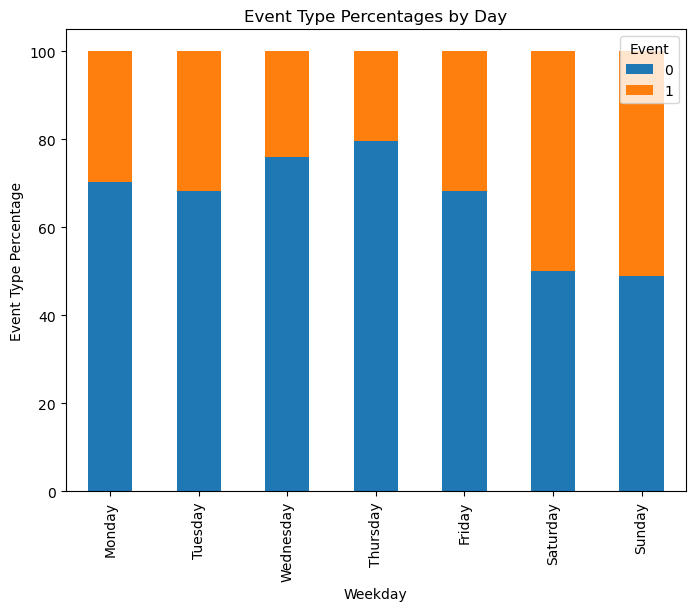

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data from CSV file into a pandas DataFrame
df = pd.read_csv('winter_merged.csv')

# define the order of weekdays from Monday to Sunday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# set the "WeekDay" column to a categorical data type with the weekday order
df['WeekDay'] = pd.Categorical(df['WeekDay'], categories=weekday_order, ordered=True)

# group the data by weekday and event type, and calculate the percentages
grouped = df.groupby(['WeekDay', 'Event'])['Light'].count().reset_index()
totals = grouped.groupby('WeekDay')['Light'].transform('sum')
grouped['Percentage'] = grouped['Light'] / totals * 100

# create a pivot table with weekdays as rows and event types as columns
pivot = pd.pivot_table(grouped, values='Percentage', index='WeekDay', columns='Event')

# plot the pivot table as a stacked bar chart
ax = pivot.plot(kind='bar', stacked=True, figsize=(8, 6))
ax.set_xlabel('Weekday')
ax.set_ylabel('Event Type Percentage')
ax.set_title('Event Type Percentages by Day')
plt.show()

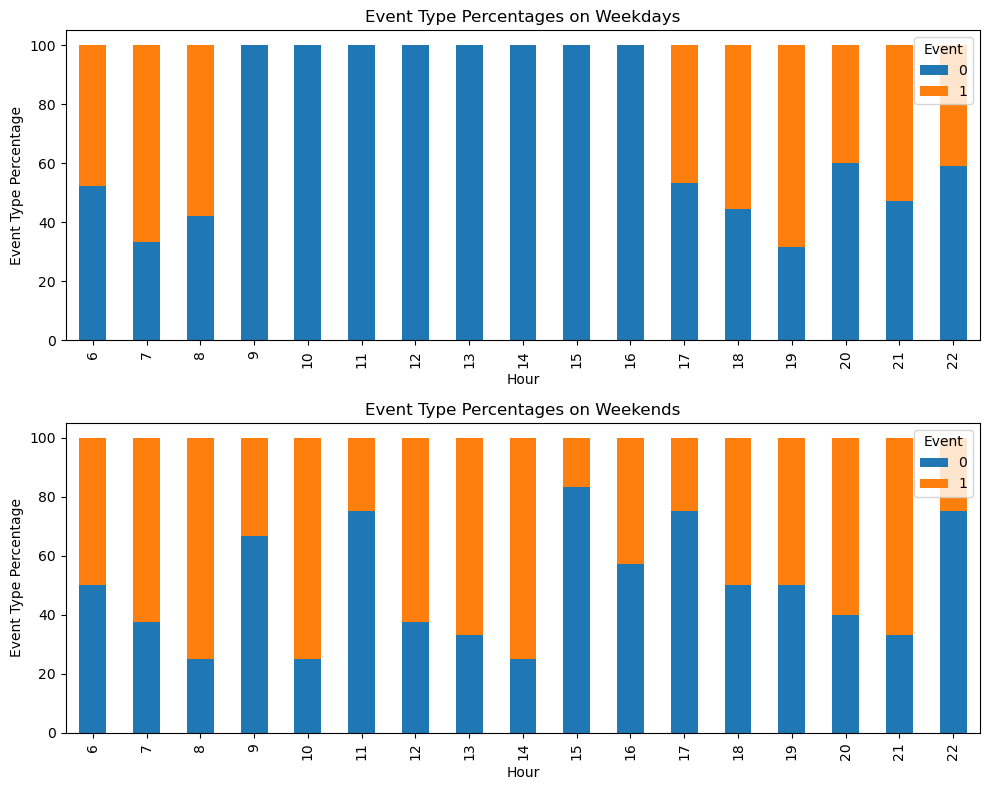

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data from CSV file into a pandas DataFrame
df = pd.read_csv('winter_merged.csv')

# create a new column to indicate whether the row belongs to weekday or weekend
df['WeekPart'] = df['WeekDay'].apply(lambda x: 'Weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')

# group the data by weekpart, hour, and event type, and calculate the percentages
grouped = df.groupby(['WeekPart', 'hour', 'Event'])['Light'].count().reset_index()
totals = grouped.groupby(['WeekPart', 'hour'])['Light'].transform('sum')
grouped['Percentage'] = grouped['Light'] / totals * 100

# create pivot tables with weekpart as rows, hour as columns, and event types as values
pivot_weekday = pd.pivot_table(grouped[grouped['WeekPart'] == 'Weekday'], values='Percentage', index='hour', columns='Event')
pivot_weekend = pd.pivot_table(grouped[grouped['WeekPart'] == 'Weekend'], values='Percentage', index='hour', columns='Event')

# plot the pivot tables as stacked bar charts
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
pivot_weekday.plot(kind='bar', stacked=True, ax=axes[0])
pivot_weekend.plot(kind='bar', stacked=True, ax=axes[1])
axes[0].set_xlabel('Hour')
axes[1].set_xlabel('Hour')
axes[0].set_ylabel('Event Type Percentage')
axes[1].set_ylabel('Event Type Percentage')
axes[0].set_title('Event Type Percentages on Weekdays')
axes[1].set_title('Event Type Percentages on Weekends')
plt.tight_layout()
plt.show()

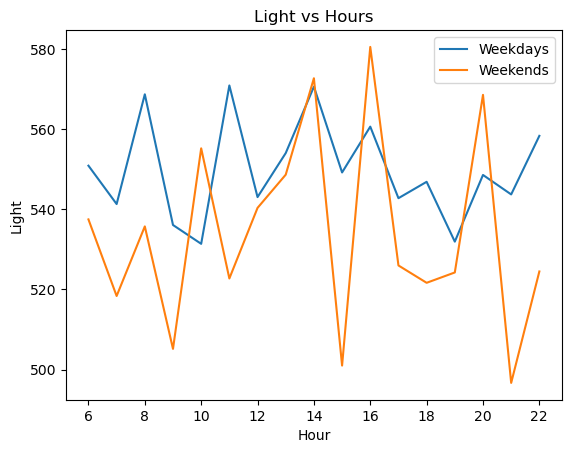

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('winter_merged.csv')

# Convert the RTC column to a datetime format
data['RTC'] = pd.to_datetime(data['RTC'])

# Create separate dataframes for weekdays and weekends
weekdays = data[data['WeekDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekends = data[data['WeekDay'].isin(['Saturday', 'Sunday'])]

# Group the data by hours and calculate the mean for each group
weekdays_mean = weekdays.groupby('hour')['Light'].mean()
weekends_mean = weekends.groupby('hour')['Light'].mean()

# Create the plots
fig, ax = plt.subplots()
ax.plot(weekdays_mean.index, weekdays_mean.values, label='Weekdays')
ax.plot(weekends_mean.index, weekends_mean.values, label='Weekends')
ax.set_xlabel('Hour')
ax.set_ylabel('Light')
ax.set_title('Light vs Hours')
ax.legend()
plt.show()

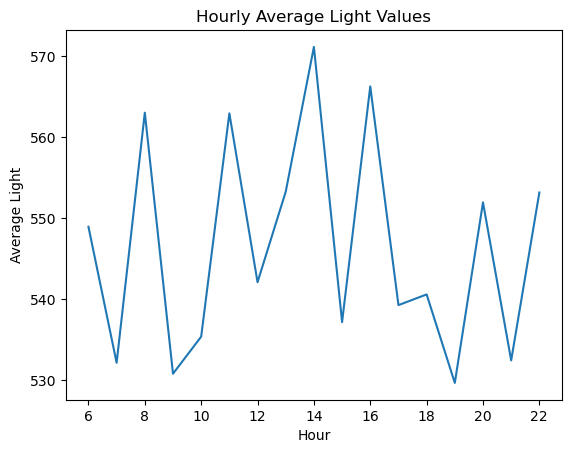

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("winter_merged.csv")

# Group the data by hour and calculate the mean light value for each hour
hourly_avg = df.groupby("hour")["Light"].mean()

# Plot the hourly averages
plt.plot(hourly_avg.index, hourly_avg.values)

# Add labels and title to the plot
plt.xlabel("Hour")
plt.ylabel("Average Light")
plt.title("Hourly Average Light Values")
plt.show()

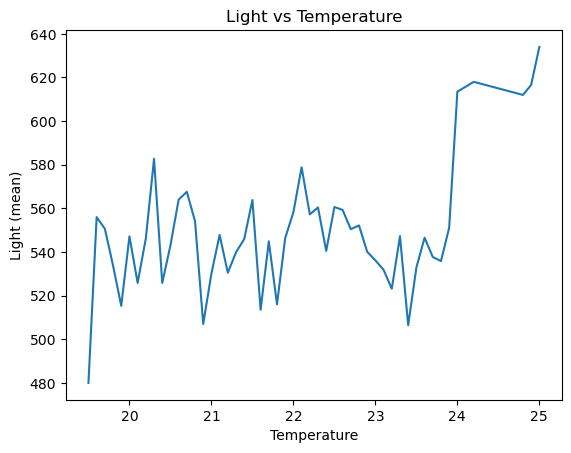

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV into a pandas dataframe
df = pd.read_csv("winter_merged.csv")

# Group the data by temperature and calculate the mean of the Light values for each group
grouped = df.groupby("Temp").mean()

# Extract Temperature and Light columns from the grouped dataframe
temp = grouped.index
light_mean = grouped["Light"]

# Create a line plot of Light vs Temperature
plt.plot(temp, light_mean)

# Add title and labels to the plot
plt.title("Light vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Light (mean)")

# Display the plot
plt.show()